In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("C:\\multi_final\\서울시공공자전거이용정보(시간대별)(12월).csv")
data.drop('GENDER_CD', axis = 'columns')
data

,RENT_DT,RENT_HR,RENT_ID,RENT_NM,RENT_TYPE,GENDER_CD,AGE_TYPE,USE_CNT,EXER_AMT,CARBON_AMT,MOVE_METER,MOVE_TIME,START_INDEX,END_INDEX,RNUM
0,2023-12-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,6.88,0.40,1738.19,9,0,0.0,1.0
1,2023-12-01,0,1569,1569.수유역2번출구,정기권,NaN,~10대,1,78.37,0.61,2638.76,16,0,0.0,2.0
2,2023-12-01,0,736,736. 오솔길공원,정기권,NaN,20대,1,40.91,0.32,1377.52,10,0,0.0,3.0
3,2023-12-01,0,740,740. 으뜸공원,정기권,NaN,20대,1,90.50,0.53,2285.26,12,0,0.0,4.0
4,2023-12-01,0,505,505. 자양사거리 광진아크로텔 앞,정기권,NaN,20대,1,21.38,0.21,900.00,6,0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640456,2023-12-31,23,735,735. 영도초등학교,정기권,NaN,50대,1,43.25,0.38,1630.00,8,0,0.0,995.0
640457,2023-12-31,23,841,841. 신용산역 1번 출구,정기권,NaN,50대,1,292.05,2.63,11346.19,112,0,0.0,996.0
640458,2023-12-31,23,348,348. 독립문역 사거리,정기권,NaN,50대,1,64.51,0.52,2262.69,19,0,0.0,997.0
640459,2023-12-31,23,1749,1749. ESA아파트 상가 앞,정기권,NaN,50대,1,49.63,0.42,1790.51,15,0,0.0,998.0


In [4]:
rent_counts = data['RENT_ID'].value_counts()

In [5]:
top_20_stations = rent_counts.head(20)
print(top_20_stations)


RENT_ID
2715    2627
1153    1978
2701    1582
2728    1448
2177    1287
3534    1241
230     1229
1124    1227
2102    1169
5052    1160
1152    1142
1210    1117
1911    1113
1653    1098
1166    1097
1160    1089
1167    1079
3798    1066
1112    1059
2620    1042
Name: count, dtype: int64


In [6]:
data_map = pd.read_csv("C:\\multi_final\\공공자전거 대여소 정보(23.12월 기준).csv")
data_map

,ID,name,loc1,loc2,lat,long,open_day,lcd_bc,qr_bc,station_type
0,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,15.0,QR
1,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,14.0,QR
2,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,13.0,QR
3,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,5.0,QR
4,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,12.0,12.0,QR
...,...,...,...,...,...,...,...,...,...,...
2761,6172.0,가양5단지아파트,강서구,강서구 가양동1481,37.564480,126.854645,2023-11-30,NaN,10.0,QR
2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import folium

In [8]:
# 상위 20개 대여소 ID
top_20_stations_ids = [2715, 1153, 2701, 2728, 2177, 3534, 230, 1124, 2102, 5052, 1152, 1210, 1911, 1653, 1166, 1160, 1167, 3798, 1112, 2620]

# 상위 20개 대여소의 정보만 필터링
top_20_stations_info = data_map[data_map['ID'].isin(top_20_stations_ids)]

# 서울의 중심에 맵을 생성합니다. 중심 좌표는 서울 시청 근처입니다.
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 상위 20개 대여소를 맵에 추가
for idx, row in top_20_stations_info.iterrows():
    folium.Marker(
        [row['lat'], row['long']],  # 위도, 경도
        popup=f"ID: {row['ID']}, 이름: {row['name']}",  # 팝업에 표시될 텍스트
    ).add_to(seoul_map)

# 맵을 저장합니다. HTML 파일로 저장되어 웹 브라우저에서 열 수 있습니다.
seoul_map.save('top_20_bike_stations.html')


In [14]:
data_01 = pd.read_csv("C:\\multi_final\\23.01.csv", encoding='cp949')
data_01

,date,rent_id,name,hour,count
0,2023-01-01,102,102. 망원역 1번출구 앞,0,15
1,2023-01-01,102,102. 망원역 1번출구 앞,1,14
2,2023-01-01,102,102. 망원역 1번출구 앞,2,12
3,2023-01-01,102,102. 망원역 1번출구 앞,3,12
4,2023-01-01,102,102. 망원역 1번출구 앞,4,12
...,...,...,...,...,...
1048570,2023-01-17,822,822. 이촌1동 마을공원,1,22
1048571,2023-01-17,822,822. 이촌1동 마을공원,2,22
1048572,2023-01-17,822,822. 이촌1동 마을공원,3,22
1048573,2023-01-17,822,822. 이촌1동 마을공원,4,22


In [21]:
# 상위 20개 대여소에 해당하는 데이터만 필터링
filtered_data = data_01[data_01['rent_id'].isin(top_20_stations_ids)]

# 결과 확인
print(filtered_data)

               date  rent_id              name  hour  count
2544     2023-01-01      230  230. 영등포구청역 1번출구     0      5
2545     2023-01-01      230  230. 영등포구청역 1번출구     1      6
2546     2023-01-01      230  230. 영등포구청역 1번출구     2      2
2547     2023-01-01      230  230. 영등포구청역 1번출구     3      1
2548     2023-01-01      230  230. 영등포구청역 1번출구     4      0
...             ...      ...               ...   ...    ...
1037500  2023-01-17      230  230. 영등포구청역 1번출구    19     17
1037501  2023-01-17      230  230. 영등포구청역 1번출구    20     15
1037502  2023-01-17      230  230. 영등포구청역 1번출구    21     11
1037503  2023-01-17      230  230. 영등포구청역 1번출구    22      7
1037504  2023-01-17      230  230. 영등포구청역 1번출구    23     11

[7704 rows x 5 columns]


In [19]:
usage_by_hour = data_01['hour'].value_counts().sort_index()


In [22]:
# 상위 20개 대여소에 해당하는 데이터만 필터링하고, 날짜가 2023-01-16까지인 데이터만 선택
filtered_data_with_date = data_01[(data_01['rent_id'].isin(top_20_stations_ids)) & (data_01['date'] <= '2023-01-16')]

# 결과 확인
print(filtered_data_with_date)


               date  rent_id              name  hour  count
2544     2023-01-01      230  230. 영등포구청역 1번출구     0      5
2545     2023-01-01      230  230. 영등포구청역 1번출구     1      6
2546     2023-01-01      230  230. 영등포구청역 1번출구     2      2
2547     2023-01-01      230  230. 영등포구청역 1번출구     3      1
2548     2023-01-01      230  230. 영등포구청역 1번출구     4      0
...             ...      ...               ...   ...    ...
1033228  2023-01-16     5052    5052. 마곡역 7번출구    19      9
1033229  2023-01-16     5052    5052. 마곡역 7번출구    20      5
1033230  2023-01-16     5052    5052. 마곡역 7번출구    21      0
1033231  2023-01-16     5052    5052. 마곡역 7번출구    22      1
1033232  2023-01-16     5052    5052. 마곡역 7번출구    23      0

[7680 rows x 5 columns]


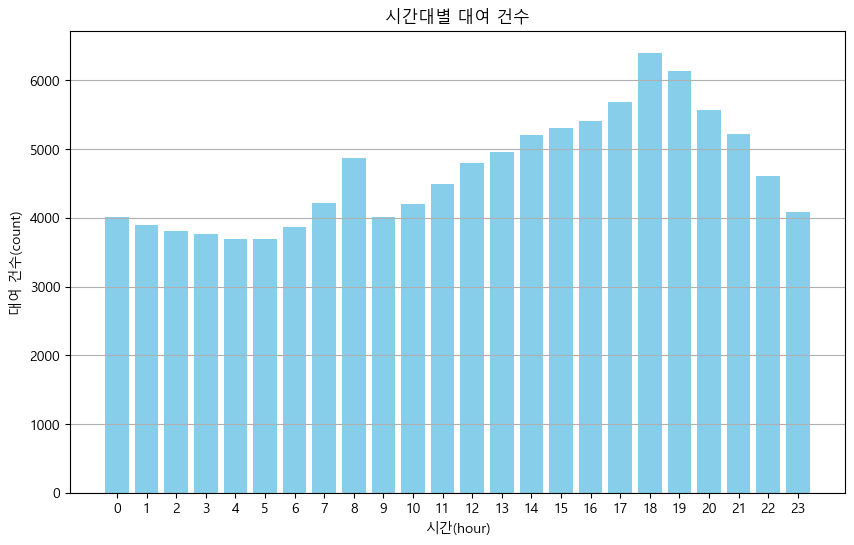

In [23]:
hourly_counts = filtered_data_with_date.groupby('hour')['count'].sum().reset_index()

# 시각화

plt.rc('font', family="Malgun Gothic")


plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(hourly_counts['hour'], hourly_counts['count'], color='skyblue')  # 막대 그래프 생성
plt.title('시간대별 대여 건수')  # 그래프 제목
plt.xlabel('시간(hour)')  # x축 레이블
plt.ylabel('대여 건수(count)')  # y축 레이블
plt.xticks(hourly_counts['hour'])  # x축에 표시될 값들을 시간(hour)으로 설정
plt.grid(axis='y')  # y축 기준으로 그리드 표시
plt.show()


           hour     count
hour   1.000000  0.117169
count  0.117169  1.000000
